In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Loading data
df = pd.read_csv(r"C:\Users\rudra\OneDrive\Desktop\Main_Flow_Tech\USvideos.csv")

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
df.shape

(35349, 16)

In [9]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,35349.000000,3.534900e+04,3.534900e+04,3.534900e+04,3.534900e+04
mean,20.104586,1.902529e+06,6.149363e+04,3.097445e+03,7.066050e+03
std,7.515576,5.839415e+06,1.816256e+05,2.956972e+04,3.068032e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.019800e+05,4.485000e+03,1.700000e+02,5.260000e+02
50%,24.000000,5.617520e+05,1.516300e+04,5.310000e+02,1.589000e+03
75%,25.000000,1.501028e+06,4.530900e+04,1.602000e+03,4.692000e+03
max,43.000000,1.493761e+08,3.749810e+06,1.674420e+06,1.361580e+06


In [11]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [13]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               505
dtype: int64

In [15]:
df.isnull().sum().sum()

505

In [17]:
df = df.fillna(0)

In [19]:
df.isnull().sum().sum()

0

In [21]:
df.duplicated().sum()

48

In [23]:
df = df.drop_duplicates()

In [25]:
df.duplicated().sum()

0

In [27]:
df.shape

(35301, 16)

In [29]:
# Because they both two columns contains links
df.drop(['thumbnail_link','description'], axis = 1, inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35301 entries, 0 to 35348
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                35301 non-null  object
 1   trending_date           35301 non-null  object
 2   title                   35301 non-null  object
 3   channel_title           35301 non-null  object
 4   category_id             35301 non-null  int64 
 5   publish_time            35301 non-null  object
 6   tags                    35301 non-null  object
 7   views                   35301 non-null  int64 
 8   likes                   35301 non-null  int64 
 9   dislikes                35301 non-null  int64 
 10  comment_count           35301 non-null  int64 
 11  comments_disabled       35301 non-null  bool  
 12  ratings_disabled        35301 non-null  bool  
 13  video_error_or_removed  35301 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.3+ MB


In [33]:
import datetime
df["trending_date"] = df["trending_date"].apply(lambda x: datetime.datetime.strptime(x, "%y.%d.%m"))

In [35]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False


In [37]:
df['publish_time'] = pd.to_datetime(df['publish_time'])

In [39]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False


In [41]:
df['video_index'] = df.index
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,video_index,publish_year,publish_month,publish_day,publish_hour
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,0,2017,11,13,17
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,1,2017,11,13,7
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,2,2017,11,12,19


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35301 entries, 0 to 35348
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                35301 non-null  object             
 1   trending_date           35301 non-null  datetime64[ns]     
 2   title                   35301 non-null  object             
 3   channel_title           35301 non-null  object             
 4   category_id             35301 non-null  int64              
 5   publish_time            35301 non-null  datetime64[ns, UTC]
 6   tags                    35301 non-null  object             
 7   views                   35301 non-null  int64              
 8   likes                   35301 non-null  int64              
 9   dislikes                35301 non-null  int64              
 10  comment_count           35301 non-null  int64              
 11  comments_disabled       35301 non-null  bool  

In [45]:
sorted(df['category_id'].unique())

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]

In [47]:
df.loc[(df['category_id']==1),'category_name'] = 'Film and Animation'
df.loc[(df['category_id']==2),'category_name'] = 'Autos and Vehicles'
df.loc[(df['category_id']==10),'category_name'] = 'Music'
df.loc[(df['category_id']==15),'category_name'] = 'Pets and Animals'
df.loc[(df['category_id']==17),'category_name'] = 'Sports'
df.loc[(df['category_id']==19),'category_name'] = 'Travel and Events'
df.loc[(df['category_id']==20),'category_name'] = 'Gaming'
df.loc[(df['category_id']==22),'category_name'] = 'People and Blog'
df.loc[(df['category_id']==23),'category_name'] = 'Comedy'
df.loc[(df['category_id']==24),'category_name'] = 'Entertainment'
df.loc[(df['category_id']==25),'category_name'] = 'News and Politics'
df.loc[(df['category_id']==26),'category_name'] = 'How to and Style'
df.loc[(df['category_id']==27),'category_name'] = 'Education'
df.loc[(df['category_id']==28),'category_name'] = 'Science and Technology'
df.loc[(df['category_id']==29),'category_name'] = 'Non-Profit and Activities'
df.loc[(df['category_id']==43),'category_name'] = 'Shows'
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35301 entries, 0 to 35348
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                35301 non-null  object             
 1   trending_date           35301 non-null  datetime64[ns]     
 2   title                   35301 non-null  object             
 3   channel_title           35301 non-null  object             
 4   category_id             35301 non-null  int64              
 5   publish_time            35301 non-null  datetime64[ns, UTC]
 6   tags                    35301 non-null  object             
 7   views                   35301 non-null  int64              
 8   likes                   35301 non-null  int64              
 9   dislikes                35301 non-null  int64              
 10  comment_count           35301 non-null  int64              
 11  comments_disabled       35301 non-null  bool  

In [49]:
df.isnull().sum().sum()

0

In [51]:
df.duplicated().sum()

0

In [53]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,video_index,publish_year,publish_month,publish_day,publish_hour,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,0,2017,11,13,17,People and Blog
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False,1,2017,11,13,7,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False,2,2017,11,12,19,Comedy


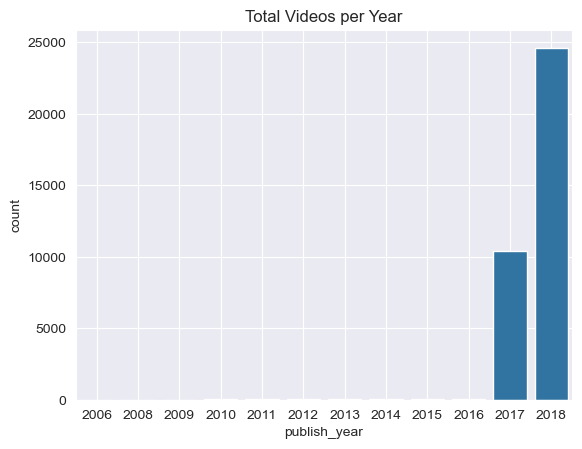

In [55]:
sns.set_style('dark')
sns.countplot(df, x = 'publish_year')
plt.grid(True)
plt.title('Total Videos per Year')
plt.show()

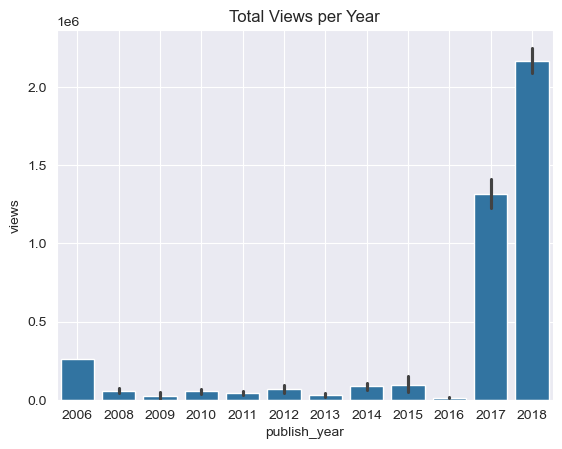

In [57]:
sns.barplot(df, x = 'publish_year',y = 'views')
plt.grid(True)
plt.title('Total Views per Year')
plt.show()

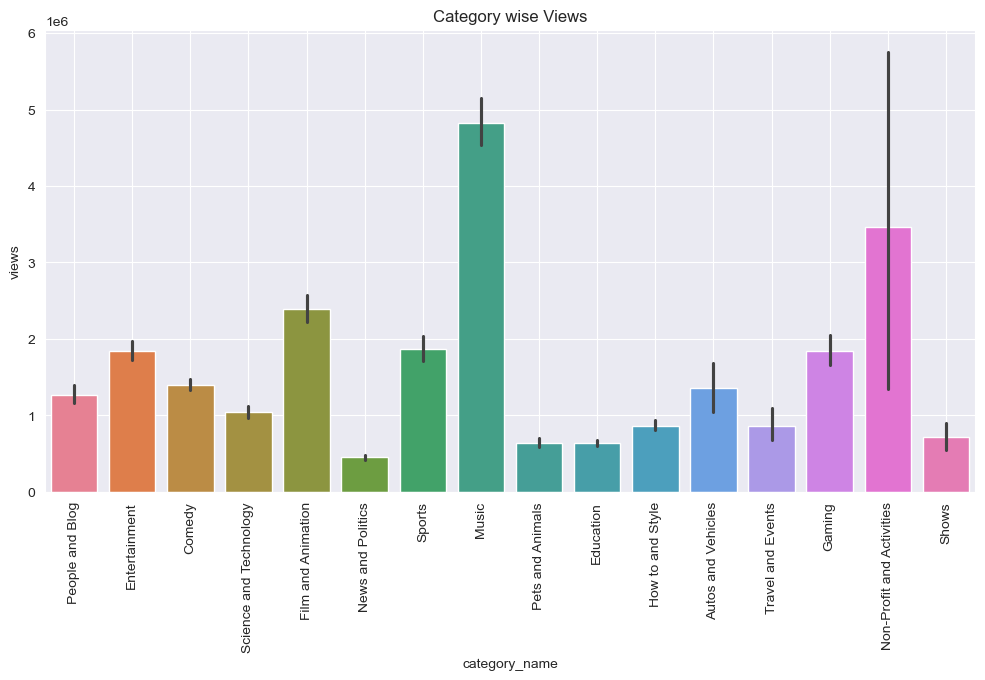

In [59]:
plt.figure(figsize=(12,6))
sns.barplot(df, x = 'category_name',y = 'views',hue = 'category_name')
plt.grid(True)
plt.title('Category wise Views')
plt.xticks(rotation=90)
plt.show()

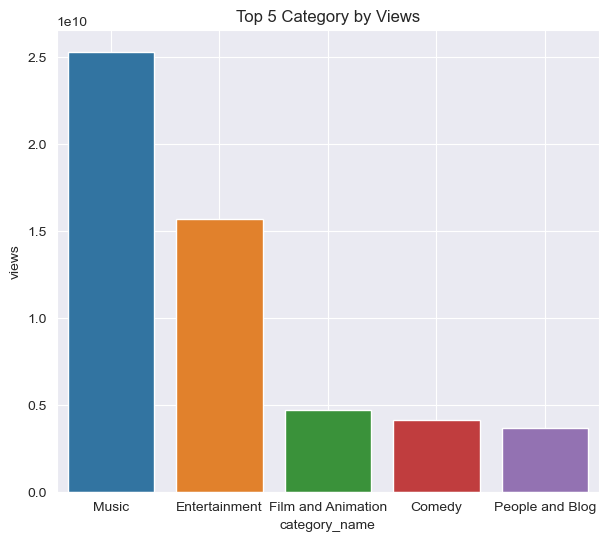

In [61]:
category_view = df.groupby('category_name')['views'].sum().reset_index()
top = category_view.sort_values(by = 'views', ascending = False).head(5)
plt.figure(figsize=(7,6))
sns.barplot(top, x = 'category_name', y = 'views', hue = 'category_name')
plt.grid(True)
plt.title('Top 5 Category by Views')
plt.show()

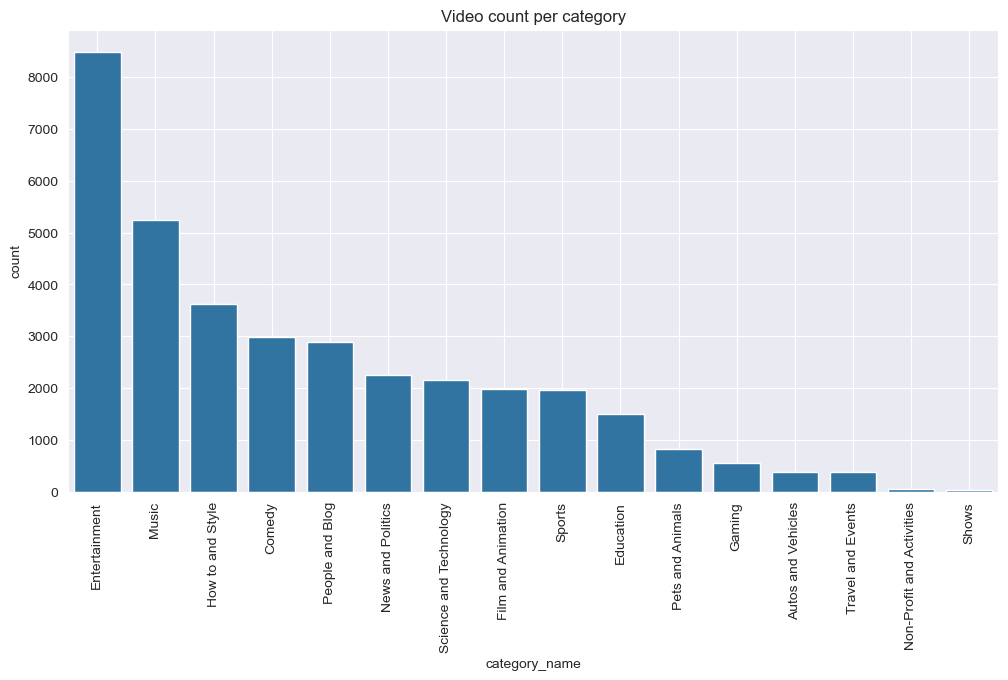

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(df, x = 'category_name', order=df['category_name'].value_counts().index)
plt.grid(True)
plt.title('Video count per category')
plt.xticks(rotation=90)
plt.show()

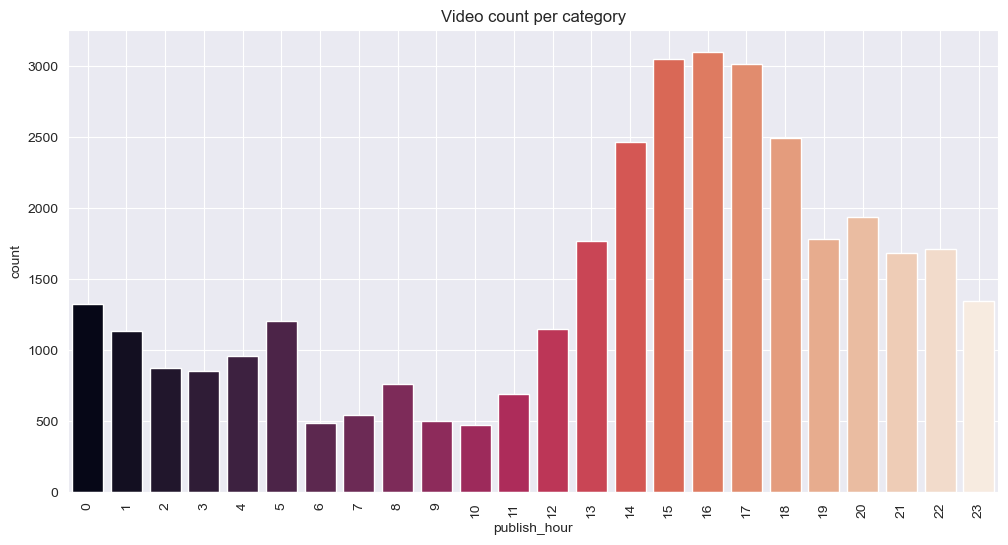

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(df, x='publish_hour',hue = 'publish_hour',palette = 'rocket', legend = False)
plt.grid(True)
plt.title('Video count per category')
plt.xticks(rotation=90)
plt.show()

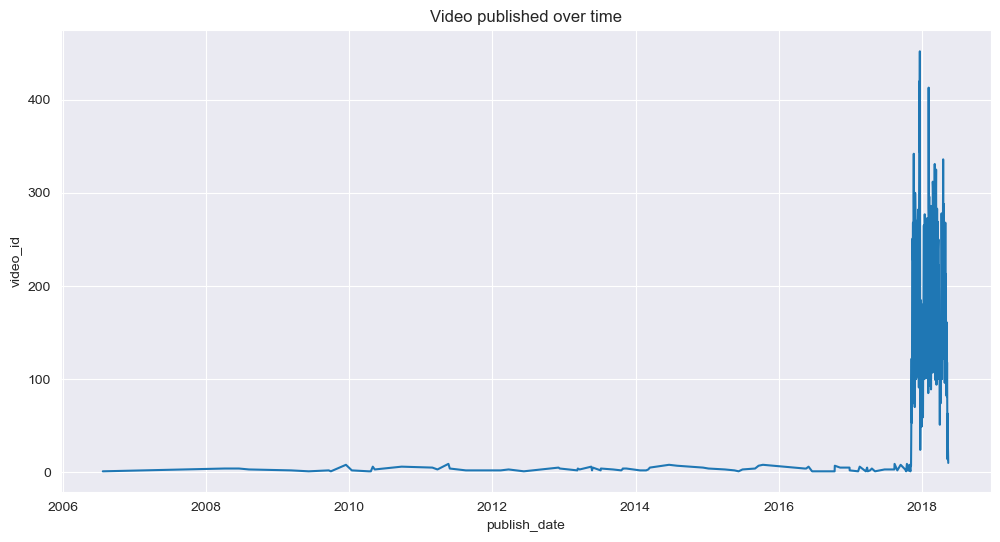

In [69]:
plt.figure(figsize=(12,6))
df['publish_date']=df['publish_time'].dt.date
data = df.groupby(df['publish_date']).count()
sns.lineplot(data = data, x = 'publish_date', y = 'video_id')
plt.grid(True)
plt.title('Video published over time')
plt.show()

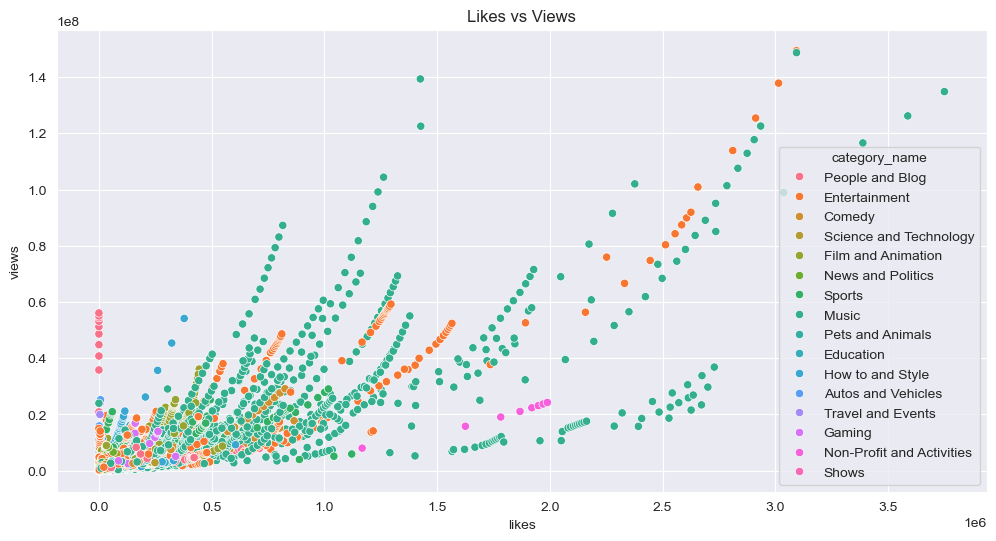

In [71]:
plt.figure(figsize = (12,6))
sns.scatterplot(df, x= 'likes', y = 'views', hue = 'category_name')
plt.grid(True)
plt.title('Likes vs Views')
plt.show()

In [73]:
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,video_index,publish_year,publish_month,publish_day,publish_hour,category_name,publish_date
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,...,False,False,False,0,2017,11,13,17,People and Blog,2017-11-13
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,1,2017,11,13,7,Entertainment,2017-11-13
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,2,2017,11,12,19,Comedy,2017-11-12


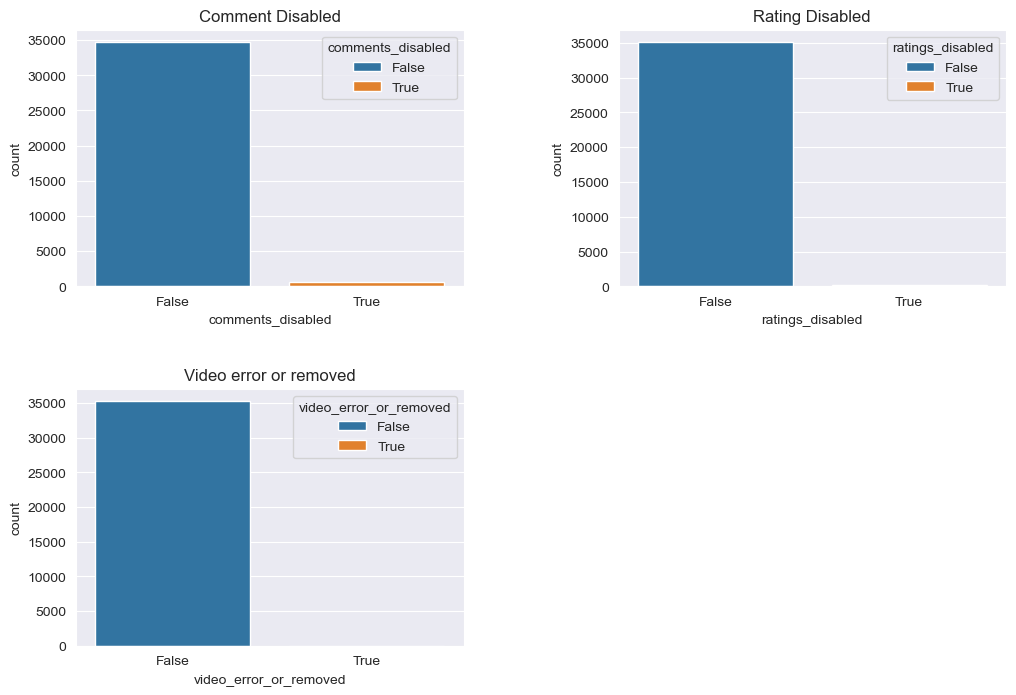

In [75]:
plt.figure(figsize = (12,8))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
plt.subplot(2,2,1)
plt.grid(True)
p1 = sns.countplot(df, x = 'comments_disabled', hue = 'comments_disabled')
p1.set_title('Comment Disabled')
plt.subplot(2,2,2)
plt.grid(True)
p2 = p1 = sns.countplot(df, x = 'ratings_disabled', hue = 'ratings_disabled')
p2.set_title('Rating Disabled')
plt.subplot(2,2,3)
plt.grid(True)
p3 = p1 = sns.countplot(df, x = 'video_error_or_removed', hue = 'video_error_or_removed')
p3.set_title('Video error or removed')
plt.show()

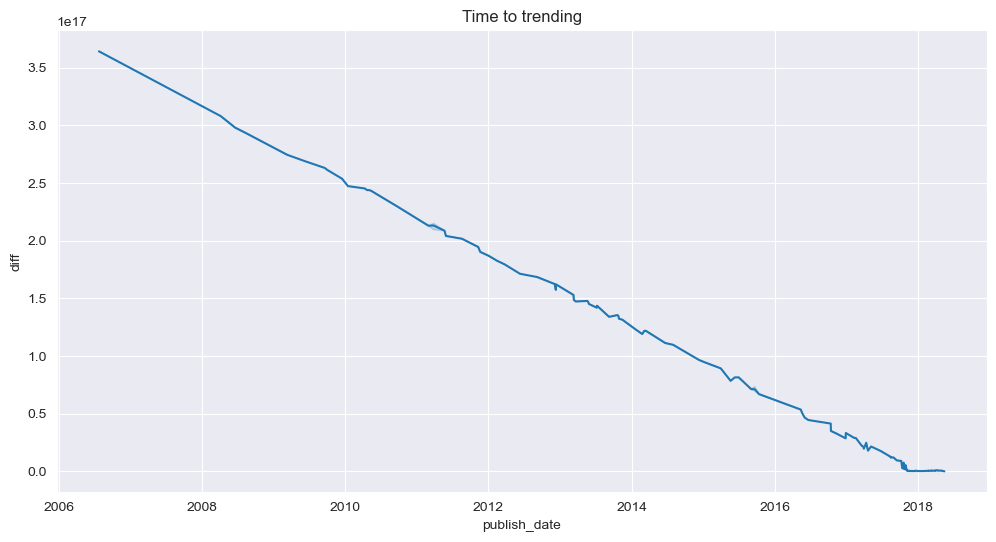

In [77]:
plt.figure(figsize = (12,6))
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['diff'] = pd.to_numeric(df['trending_date'] - df['publish_date'], downcast = 'integer')
sns.lineplot(df, x= 'publish_date',y = 'diff')
plt.grid(True)
plt.title('Time to trending')
plt.show()

In [79]:
co_relation = df['views'].corr(df['likes'])
co_relation

0.82512912121071